# QUANTITATIVE TASK


A notebook documenting my thought-process:

— The Department for Big Lorries inspects goods vehicles on the nation's roads

— From 2000 onwards: annual inspection of a sample of goods vehicles 

— The sampling is not random, and subject to two constraints:
i) keep rate of sampling once every 6–12 years for **each lorry on the road**
ii) poor condition vehicles sampled at a higher rate, good condition vehicles sampled at a lower rate

— Inspection comprises Categorization:

i) hgv, lgv or personnel
ii) which manufactuer, has to be of the 10 most common?
iii)0-100 scale (linear?) of condition

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-How-does-the-sample-size-vary-from-year-to-year?-Are-there-any-years-that-the-DfBL-should-exclude-from-this-analysis?" data-toc-modified-id="-How-does-the-sample-size-vary-from-year-to-year?-Are-there-any-years-that-the-DfBL-should-exclude-from-this-analysis?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><span style="color: blue"> How does the sample size vary from year-to-year? Are there any years that the DfBL should exclude from this analysis?</span></a></span></li><li><span><a href="#-Assuming-that-the-data-is-a-representative-sample-of-the-population;-does-the-condition-of-road-going-vehicles-appear-to-be-changing-over-time?-If-so,-is-it-deteriorating-or-improving?" data-toc-modified-id="-Assuming-that-the-data-is-a-representative-sample-of-the-population;-does-the-condition-of-road-going-vehicles-appear-to-be-changing-over-time?-If-so,-is-it-deteriorating-or-improving?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><span style="color: blue"> Assuming that the data is a representative sample of the population; does the condition of road-going vehicles appear to be changing over time? If so, is it deteriorating or improving?</span></a></span></li><li><span><a href="#-Are-there-any-particular-vehicle-types-or-manufacturers-that-the-DfBL-should-pay-special-attention-to?-Would-you-suggest-any-changes-to-the-sampling-methodology-to-obtain-better-information-for-these-types?" data-toc-modified-id="-Are-there-any-particular-vehicle-types-or-manufacturers-that-the-DfBL-should-pay-special-attention-to?-Would-you-suggest-any-changes-to-the-sampling-methodology-to-obtain-better-information-for-these-types?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><span style="color: blue"> Are there any particular vehicle types or manufacturers that the DfBL should pay special attention to? Would you suggest any changes to the sampling methodology to obtain better information for these types?</span></a></span></li><li><span><a href="#-Since-2000-the-vehicle-inspectors-have-slowly-improved-the-algorithm-that-they-use-to-determine-which-vehicles-to-inspect-more-frequently,-so-that-they-are-getting-better-at-inspecting-vehicles-in-poor-condition-more-often.-What-effect-could-this-have-on-the-results?" data-toc-modified-id="-Since-2000-the-vehicle-inspectors-have-slowly-improved-the-algorithm-that-they-use-to-determine-which-vehicles-to-inspect-more-frequently,-so-that-they-are-getting-better-at-inspecting-vehicles-in-poor-condition-more-often.-What-effect-could-this-have-on-the-results?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><span style="color: blue"> Since 2000 the vehicle inspectors have slowly improved the algorithm that they use to determine which vehicles to inspect more frequently, so that they are getting better at inspecting vehicles in poor condition more often. What effect could this have on the results?</span></a></span></li><li><span><a href="#-5.-Is-DfBL-conducting-a-sufficient-number-of-inspections-a-year?-Explain-and-justify-your-answer." data-toc-modified-id="-5.-Is-DfBL-conducting-a-sufficient-number-of-inspections-a-year?-Explain-and-justify-your-answer.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span><span style="color: blue"> 5. Is DfBL conducting a sufficient number of inspections a year? Explain and justify your answer.</span></a></span></li><li><span><a href="#Extra:-The-sampling-methodology-could-be-improved" data-toc-modified-id="Extra:-The-sampling-methodology-could-be-improved-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Extra: The sampling methodology could be improved</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy import stats
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
import regex as re

 Initial Inspection

In [2]:
vehicle= pd.read_csv('VehicleData_csv.csv')
vehicle_10 = pd.read_excel('VehicleData_2010.xlsx')
vehicle_03 = pd.read_excel('VehicleData_2003.xls')

In [3]:
vehicle_03.equals(vehicle_10)

True

In [4]:
vehicle_10.equals(vehicle)

True

In [5]:
# Data is identical so must just be the file type: I will ignore duplicates and proceed 

In [6]:
vehicle.head()

,VehicleID,FinancialYear,VehicleType,Manufacturer,ConditionScore
0,31,2008-09,Light Goods Vehicle,Volkswagen,55
1,31,2009-10,Light Goods Vehicle,Volkswagen,80
2,95,2005-06,Heavy Goods Vehicle,DAF,50
3,111,2002-03,Light Goods Vehicle,Iveco,65
4,112,2004-05,Personnel Vehicle,Renault,100


In [7]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30305 entries, 0 to 30304
Data columns (total 5 columns):
VehicleID         30305 non-null int64
FinancialYear     30305 non-null object
VehicleType       30305 non-null object
Manufacturer      30305 non-null object
ConditionScore    30305 non-null int64
dtypes: int64(2), object(3)
memory usage: 1.2+ MB


In [8]:
vehicle.isnull().sum()

VehicleID         0
FinancialYear     0
VehicleType       0
Manufacturer      0
ConditionScore    0
dtype: int64

In [9]:
vehicle['VehicleType'].value_counts()

Light Goods Vehicle    13993
Heavy Goods Vehicle    11031
Personnel Vehicle       5281
Name: VehicleType, dtype: int64

In [10]:
vehicle['Manufacturer'].value_counts() 
# Surprising that no niche brand is ever sampled

Scania           7520
Mercedes Benz    5646
Volvo            4441
Iveco            3322
Renault          2618
MAN              1701
DAF              1558
Fiat             1387
Ford             1313
Volkswagen        799
Name: Manufacturer, dtype: int64

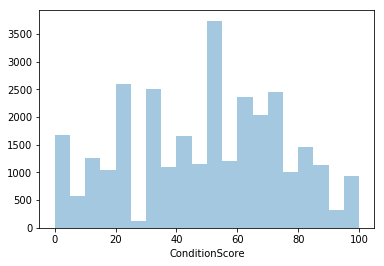

In [11]:
condition = vehicle['ConditionScore']
sns.distplot(condition, bins= 20,kde=False);
# 50 is the mode by a long way. gaps at 20-30

In [12]:
vehicle.VehicleID.nunique()
# 20509 unique IDs
# Task directions seem to indicate that all vehicles on the road in 2000 should be included 
# as over 12 year period. 
#Or that at least those on the road in 2000 and that were still on the road years later


20509

In [13]:
# Therefore we assume that for the year 2000, at least there were roughly 20,000 lorries on the road
# Obviously we do not know year on year increase or the retire rate. But assuming this is fairly stable.
# UK population increased 8% over the period, GDP increased a lot more.
 

https://www.racfoundation.org/motoring-faqs/mobility:
"Between 2002 and 2012...the number of lorries (Heavy Goods Vehicles or HGVs) on British roads fell
by 5 per cent to 460,000."

In [14]:
# from a brief look online the number is likely a lot higher than 20,000, but I think I will stay in the
# remit of the exercise and take the direction's word. And derive what I can
#assuming the task direction is correct. 

<span style="color:red">
if we assume the total change of vehicles on the road for the period is 0, so for each year i,    $\sum _{i}\Delta n_{i} = 0$, where $n_{i}$ is the no. of vehicles on the road at year i, then
$n_{2000}= 20,500 + \varepsilon $ 

essentially : assume, the new vehicle rate = retire rate

## <span style="color:blue"> How does the sample size vary from year-to-year? Are there any years that the DfBL should exclude from this analysis?


In [15]:
# Convert financial year to beginning of the year. 
vehicle['Year'] = vehicle['FinancialYear'].apply(lambda x: int(re.findall(r'[^-]*',x)[0])) 

In [16]:
grouped_by_year = vehicle.groupby('Year')

In [17]:
sample_size = grouped_by_year.size()

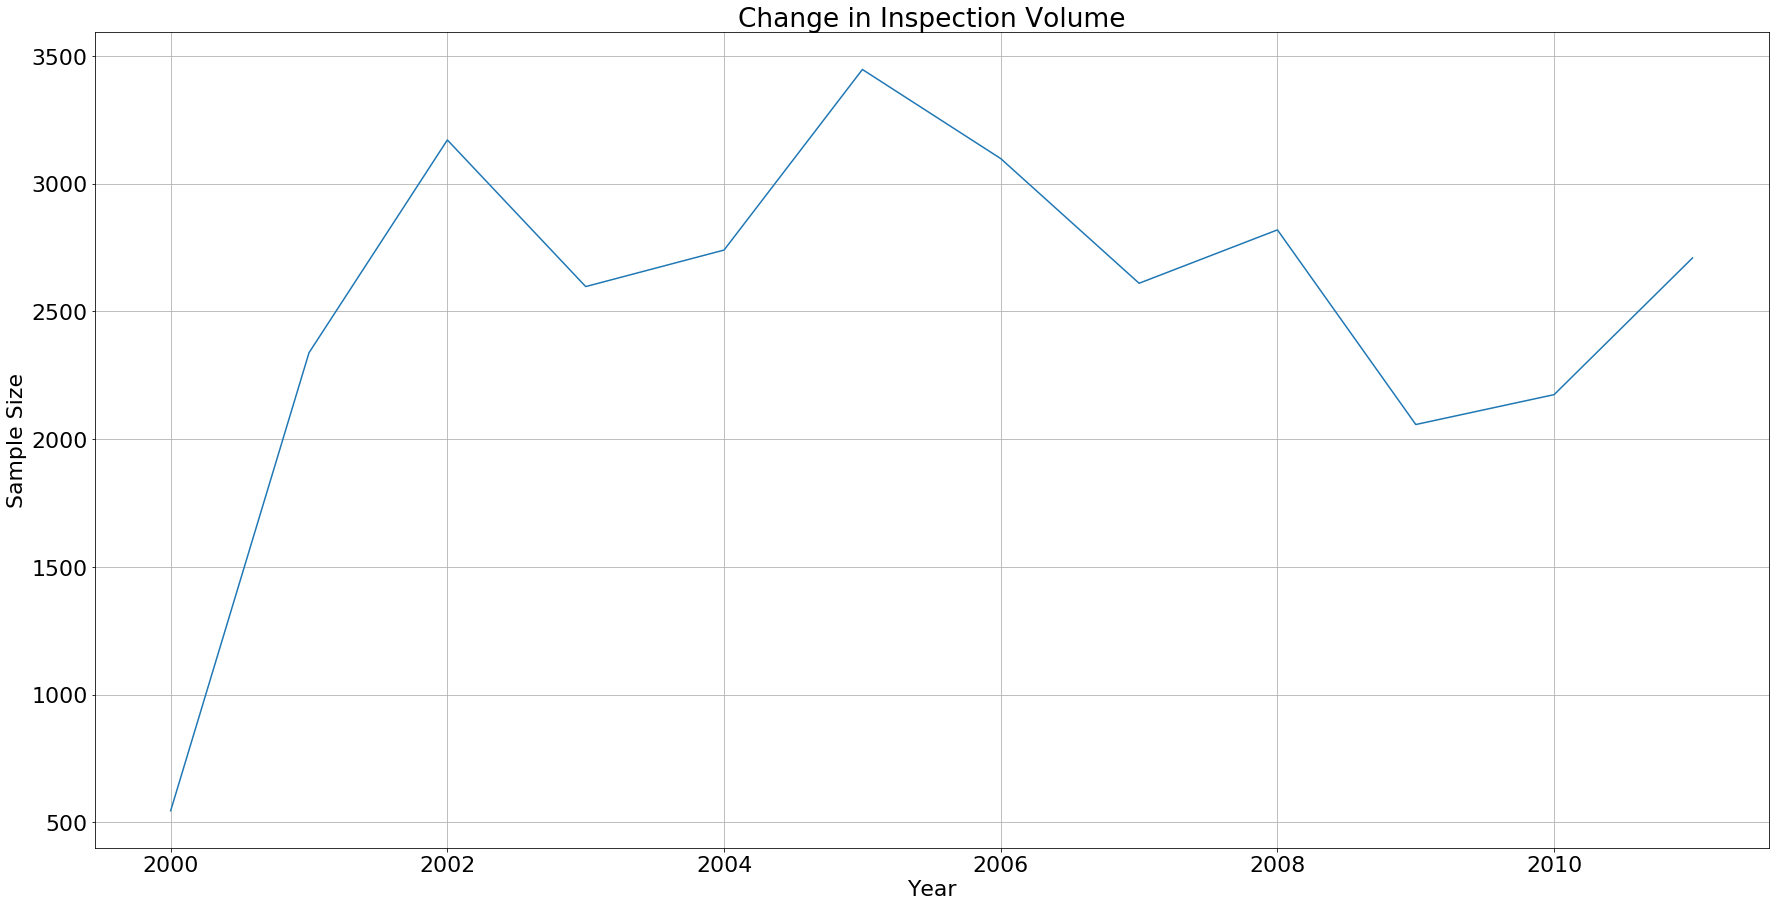

In [18]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(30,15))
ax = grouped_by_year.size().plot()
ax.set_ylabel('Sample Size')
plt.title('Change in Inspection Volume')
plt.grid(b=True);

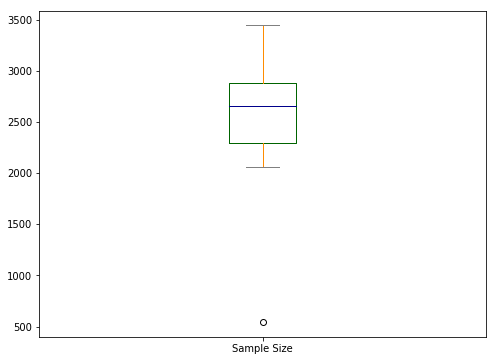

In [19]:
plt.rcParams.update({'font.size': 10})

pd.DataFrame(sample_size,columns=['Sample Size']).plot.box(figsize=(8, 6),color = dict(boxes='DarkGreen', whiskers='DarkOrange',
medians='DarkBlue', caps='Gray'));

In [20]:
# The sample size is an outlier for the year 2000, in terms of how distinct it is from the pack
#(ie. the z score). 
# I do not think this should be excluded from analysis as it definitely has valuable information 
# about which lorries have been sampled.
# 545 is large enough as further inspection of statistics of other fields have
# similar variance/cumulants 
# The year 2000 is missing observation points classed as Mercedez Benz, and only one point with Iveco

# can see in Confidence Intervals, that still significant.

# Just keep the year 2000 as a caveat when analysing: It is the inception of the inspections and
#there is perhaps no previous data to base sampling on.



## <span style="color:blue"> Assuming that the data is a representative sample of the population; does the condition of road-going vehicles appear to be changing over time? If so, is it deteriorating or improving?

In [21]:
# Task directions intimate that the data is the entirety of the inspections
# "contains the results of the inspections from 2000 onwards"

In [22]:
# Unclear, but assume that this question is stating that the data is a representative sample of 
# the vehicle population on the road for that year.

<span style="color:red">
Let's assume that for yeach year i, the sample $X_{i}$ from the total population $Y_{i}$ is representative, we know that $X_{i}$ contains roughly 10% of the vehicles in $Y_{i}$ for each year after 2001

In [23]:
def sample_std(X):
    return np.std(X, ddof=1)
# Important to have the sample standard deviation, need bessel correction: each is sample population
# from Yi

In [24]:
score_change = grouped_by_year['ConditionScore'].agg(['size','mean', 'median', sample_std,np.ptp])

In [25]:
score_change
# identical median is due to that being a very popular score. 
# similar sample variances, therefore can use standard t_test => can prove change is significant
# ptp is the range, therefore each year, there exists vehicles classed as 100 and 0

,size,mean,median,sample_std,ptp
Year,,,,,
2000,545,49.884404,50,25.168320,100
2001,2338,51.943541,50,26.592542,100
2002,3171,50.976033,50,26.877771,100
2003,2597,49.539854,50,25.487052,100
2004,2740,45.897810,50,25.588234,100
2005,3447,45.643168,50,25.292859,100
2006,3098,46.695287,50,25.338282,100
2007,2610,47.454023,50,25.267120,100
2008,2819,45.724016,50,25.434864,100


In [26]:
def CI(sample_mean,sample_std,size):
    return list(sample_mean + stats.norm().ppf([0.025,0.975]) * sample_std / np.sqrt(size))
y_bands = [CI(score_change['mean'][i],score_change['mean'][i],score_change['size'][i]) for i in score_change.index]

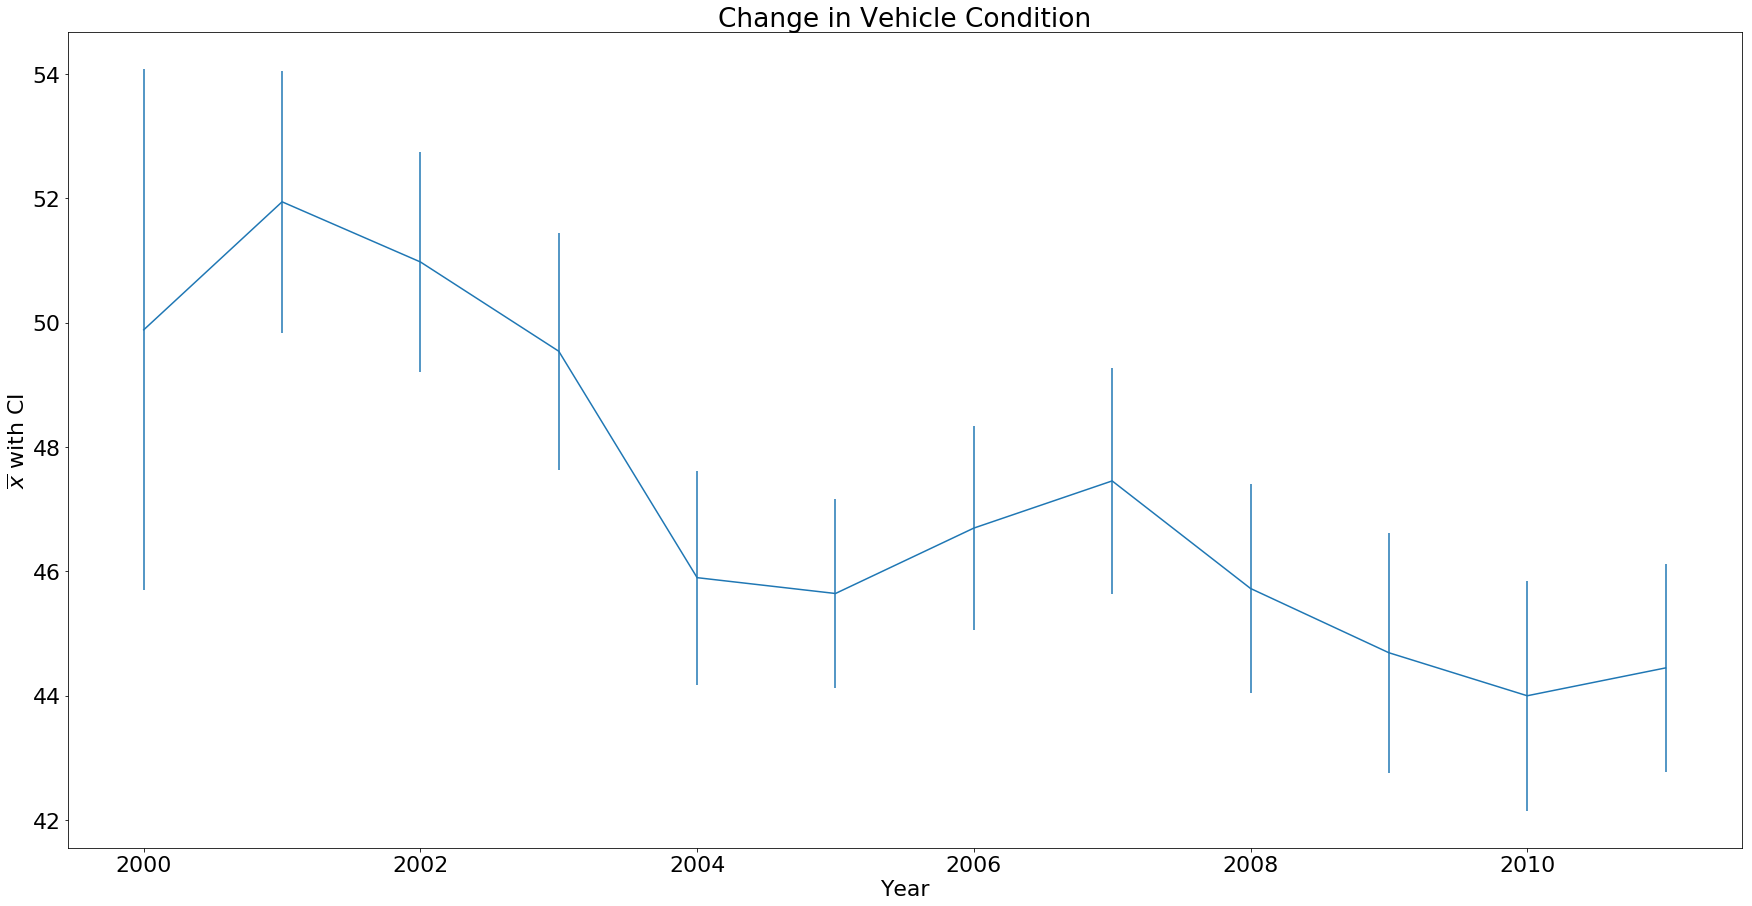

In [27]:

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(30,15))
ax.set_ylabel('$\overline {x}$ with CI')
ax.set_xlabel('Year')

plt.title('Change in Vehicle Condition')
ax = plt.errorbar(score_change.index, score_change['mean'], yerr=[score_change['mean'] - np.array(y_bands).T[0] ,np.array(y_bands).T[1]-score_change['mean'] ])


In [28]:
# Obvious trend of condition decline if 2.) assumption holds
#95% Confidence intervals are plotted

In [29]:
year_on_year_p_values = []
for i,values in grouped_by_year['ConditionScore']:
    if i == 2001:
        start_distribution = values
    if i > 2001:
        year_on_year_p_values.append(scipy.stats.ttest_ind(start_distribution, values).pvalue)
p = pd.DataFrame(year_on_year_p_values)
p.index = [2000+i for i in range(2,12)]
p.columns = ['p_value of sample cf. 2001']
p

,p_value of sample cf. 2001
2002,1.847367e-01
2003,1.200194e-03
2004,2.145817e-16
2005,1.161389e-19
2006,1.558583e-13
2007,1.237954e-09
2008,1.434774e-17
2009,7.532996e-20
2010,1.425427e-24
2011,3.720106e-24


In [30]:
# The  changing score year_on_year is statistically significant from a standard 2 tailed t-test.
# just checking 2001 distribution of scores to years later, p_values quickly show difference 
#starts being very significant

## <span style="color:blue"> Are there any particular vehicle types or manufacturers that the DfBL should pay special attention to? Would you suggest any changes to the sampling methodology to obtain better information for these types?

In [31]:
vehicle_types = vehicle.groupby(['VehicleType','Year'])['ConditionScore'].agg(['mean', 'size'])

In [32]:
vehicle_types

mean  size
VehicleType         Year                 
Heavy Goods Vehicle 2000  42.984293   191
                    2001  47.021710   737
                    2002  44.995331  1071
                    2003  43.950216   924
                    2004  39.472017   947
                    2005  43.629167  1200
                    2006  41.056273  1084
                    2007  42.221591   880
                    2008  41.154261   927
                    2009  40.036688   954
                    2010  37.729790   903
                    2011  38.685078  1213
Light Goods Vehicle 2000  44.559184   245
                    2001  46.283390  1168
                    2002  45.579470  1510
                    2003  44.427966  1180
                    2004  42.228507  1326
                    2005  40.145497  1732
                    2006  43.112218  1506
                    2007  43.345043  1281
                    2008  40.747875  1412
                    2009  41.452163   763
                    2010  40.939693   912
                    2011  38.537578   958
Personnel Vehicle   2000  73.944954   109
                    2001  75.588915   433
                    2002  75.644068   590
                    2003  72.251521   493
                    2004  69.346895   467
                    2005  68.825243   515
                    2006  69.350394   508
                    2007  69.432071   449
                    2008  69.187500   480
                    2009  65.014706   340
                    2010  67.534819   359
                    2011  67.955390   538

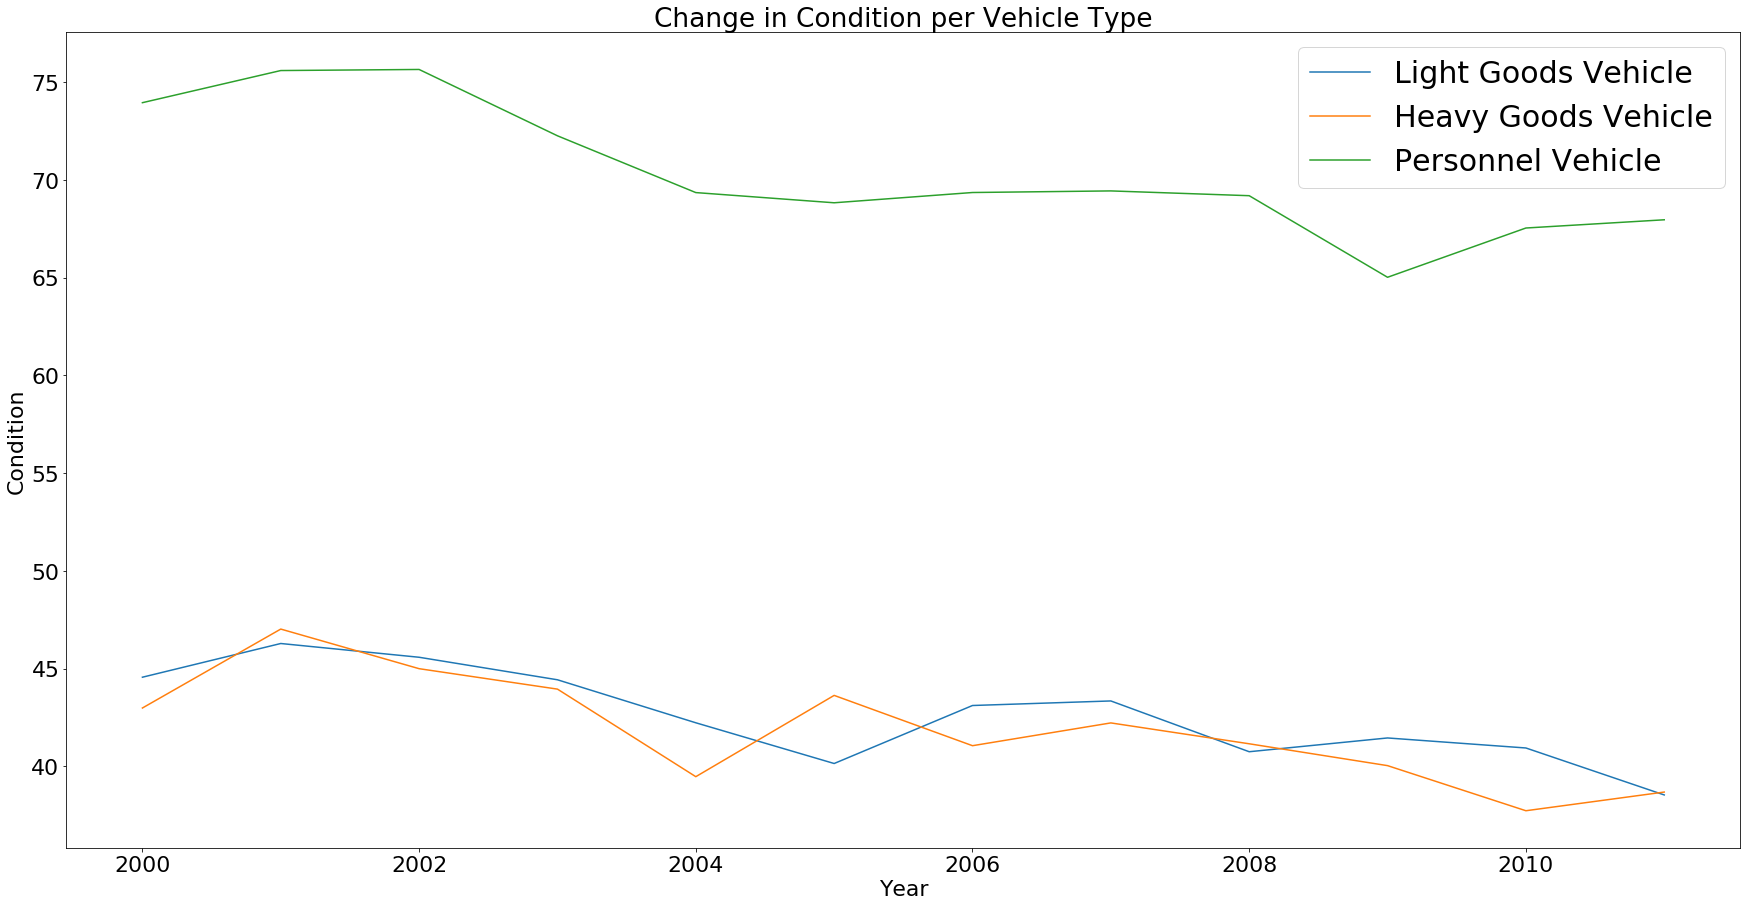

In [33]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(30,15))
plt.title('Change in Condition per Vehicle Type')
for i in vehicle['VehicleType'].unique():
    ax = plt.plot(score_change.index, vehicle_types.xs(i, level='VehicleType', axis=0)['mean'],label=i)
plt.ylabel('Condition')
plt.xlabel('Year')
plt.legend(loc='best',prop={'size': 30});



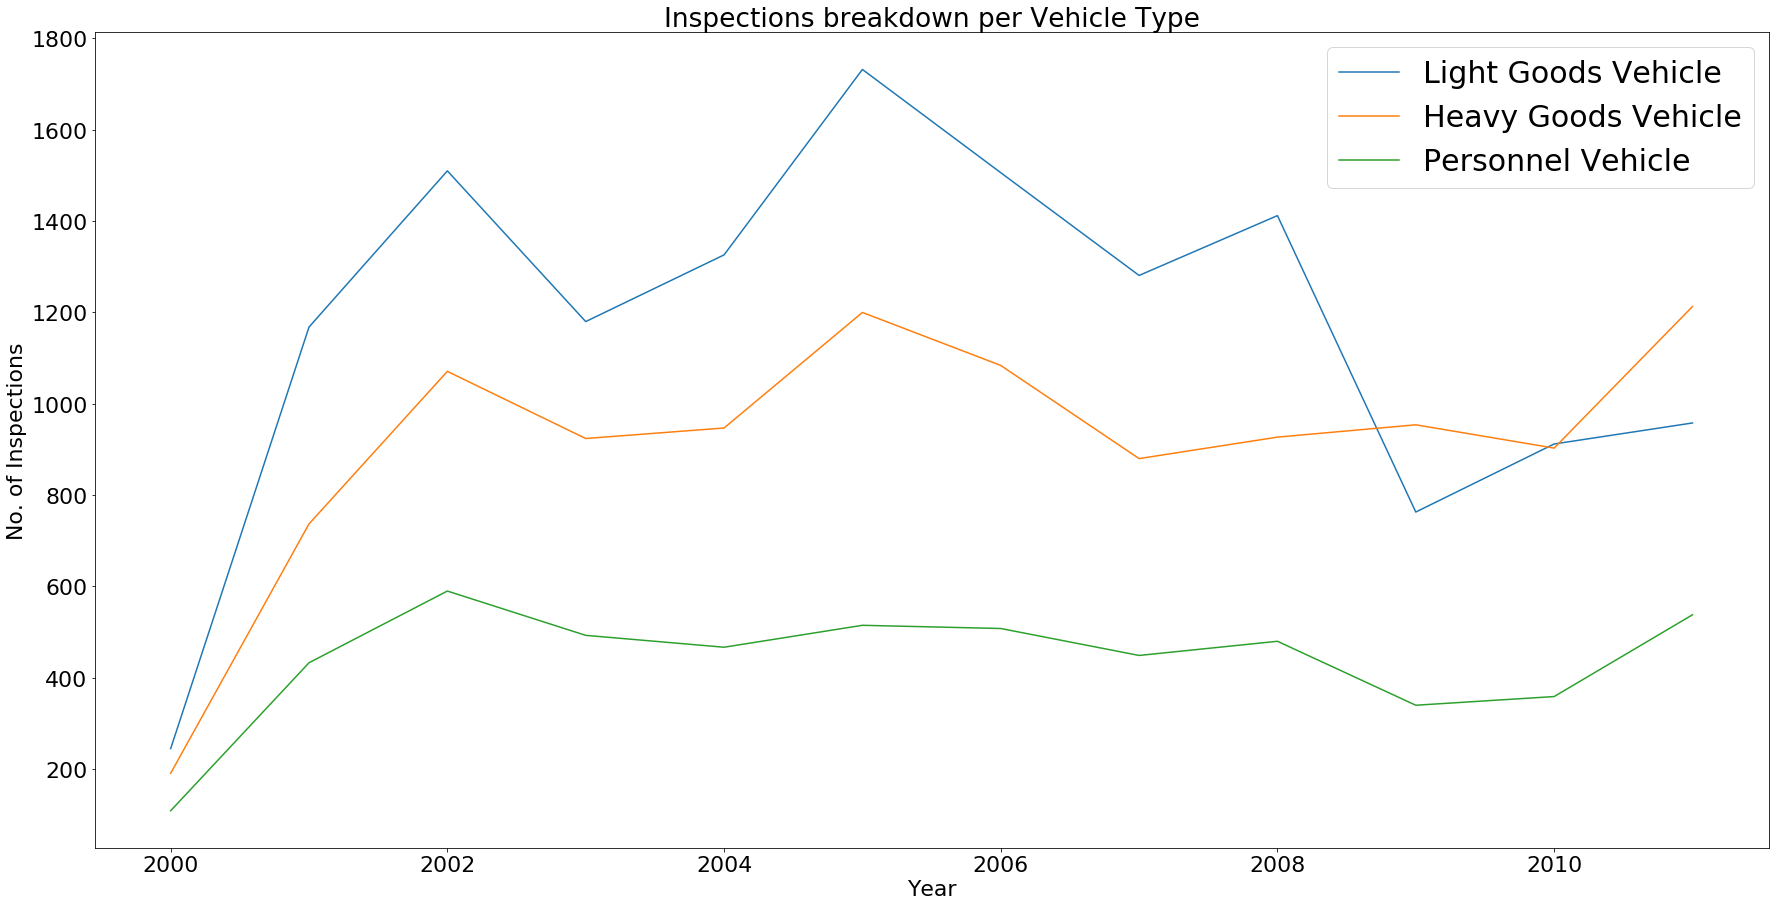

In [34]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(30,15))
plt.title('Inspections breakdown per Vehicle Type')
for i in vehicle['VehicleType'].unique():
    ax = plt.plot(score_change.index, vehicle_types.xs(i, level='VehicleType', axis=0)['size'],label=i)
plt.ylabel('No. of Inspections')
plt.xlabel('Year')
plt.legend(loc='best',prop={'size': 30});


In [35]:
# Similarly for Manufacturers

In [36]:
vehicle_manufacturers = vehicle.groupby(['Manufacturer','Year'])['ConditionScore'].agg(['mean', 'size'])

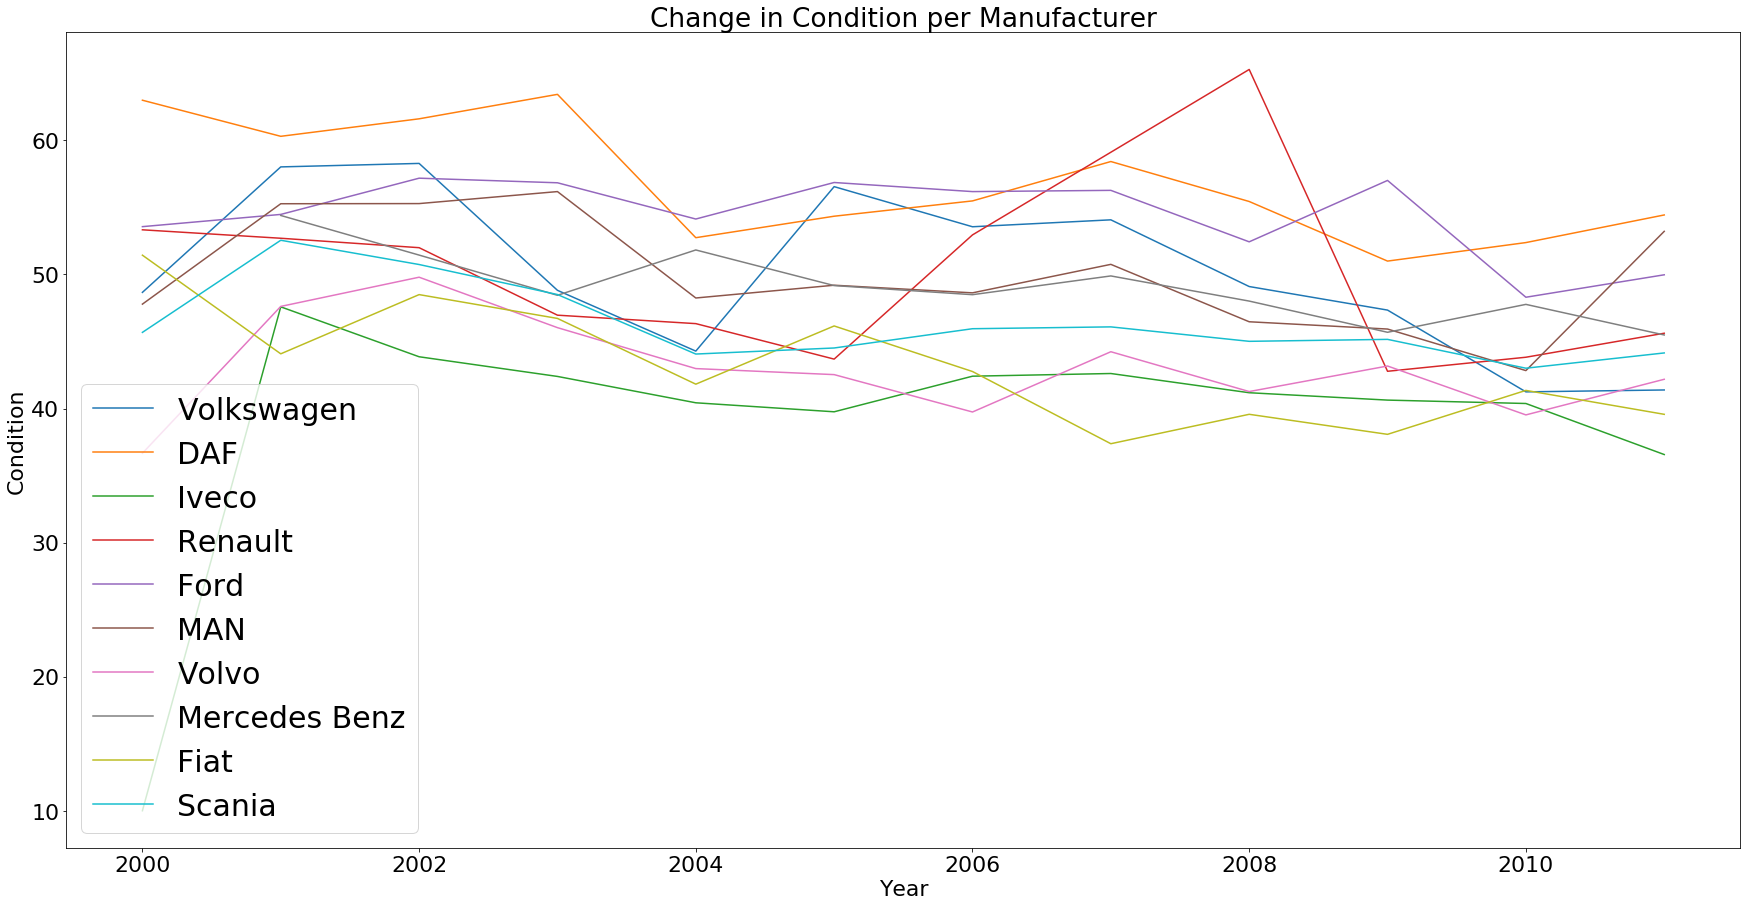

In [37]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(30,15))
plt.title('Change in Condition per Manufacturer')
for i in vehicle['Manufacturer'].unique():
    ax = plt.plot(vehicle_manufacturers.xs(i, level='Manufacturer', axis=0).index, vehicle_manufacturers.xs(i, level='Manufacturer', axis=0)['mean'],label=i)
plt.ylabel('Condition')
plt.xlabel('Year')
plt.legend(loc='best',prop={'size': 30});


In [38]:
# Zoom in, as Iveco had sample size of 1 for year 2000, and Mercedes Benz was not sampled

In [39]:
years = score_change.index[1:]

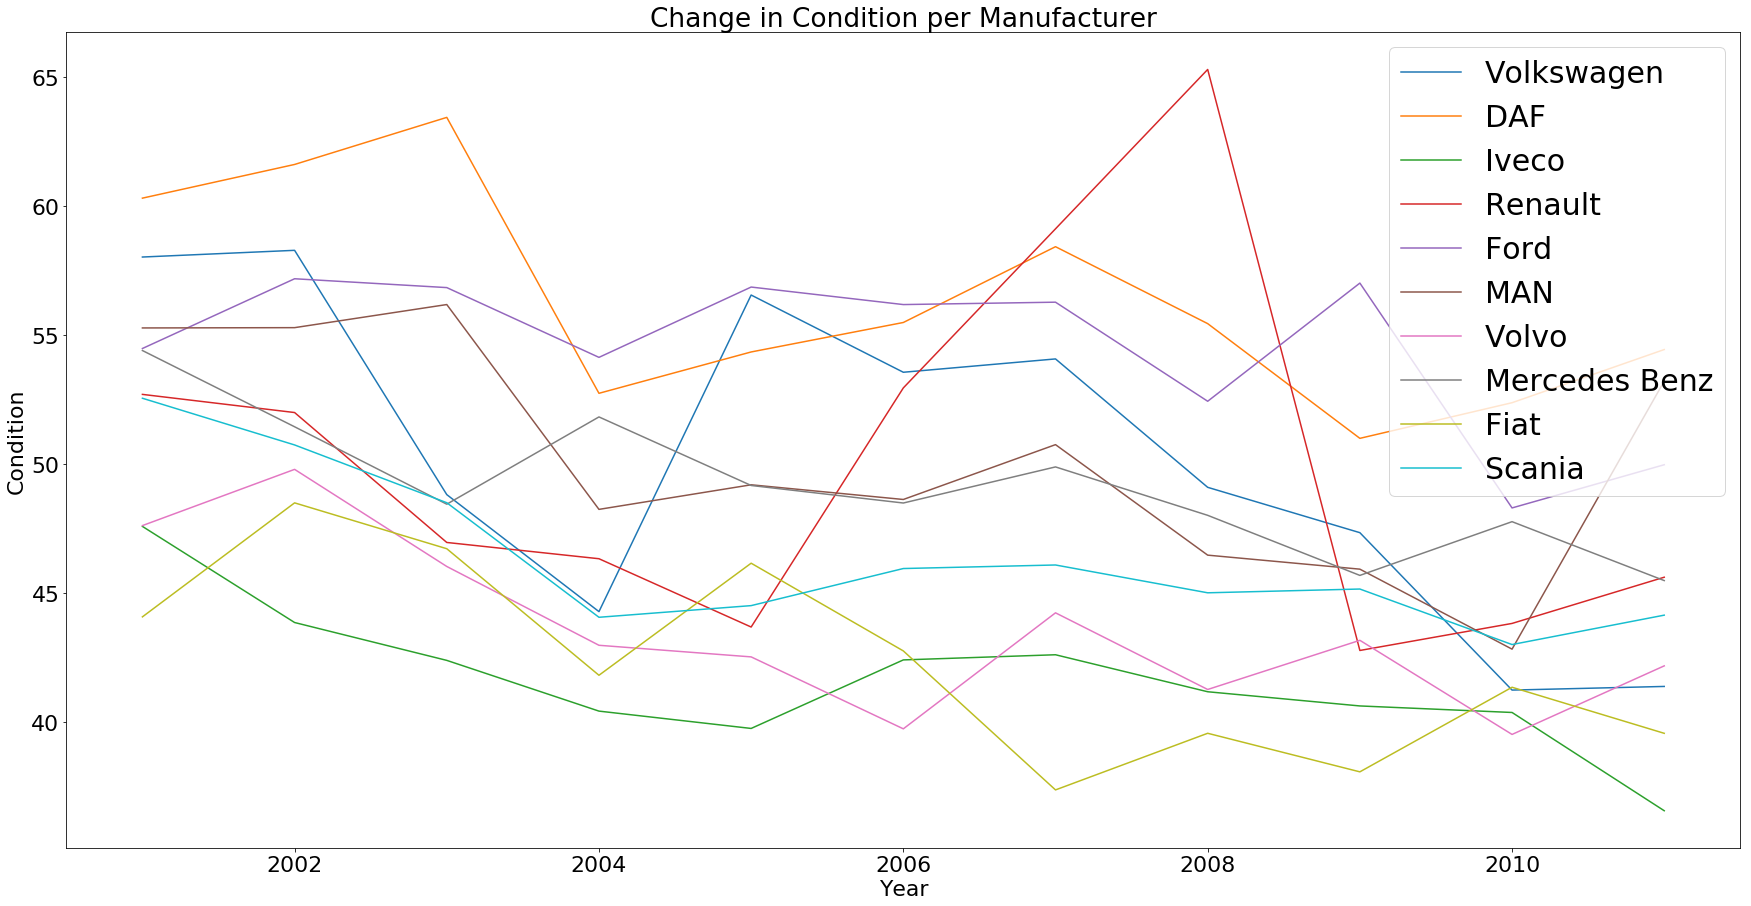

In [40]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(30,15))
plt.title('Change in Condition per Manufacturer')
for i in vehicle['Manufacturer'].unique():
    df = vehicle_manufacturers.xs(i, level='Manufacturer', axis=0)
    df = df[df.index > 2000]
    ax = plt.plot(years, df['mean'],label=i)
plt.ylabel('Condition')
plt.xlabel('Year')
plt.legend(loc='best',prop={'size': 30});

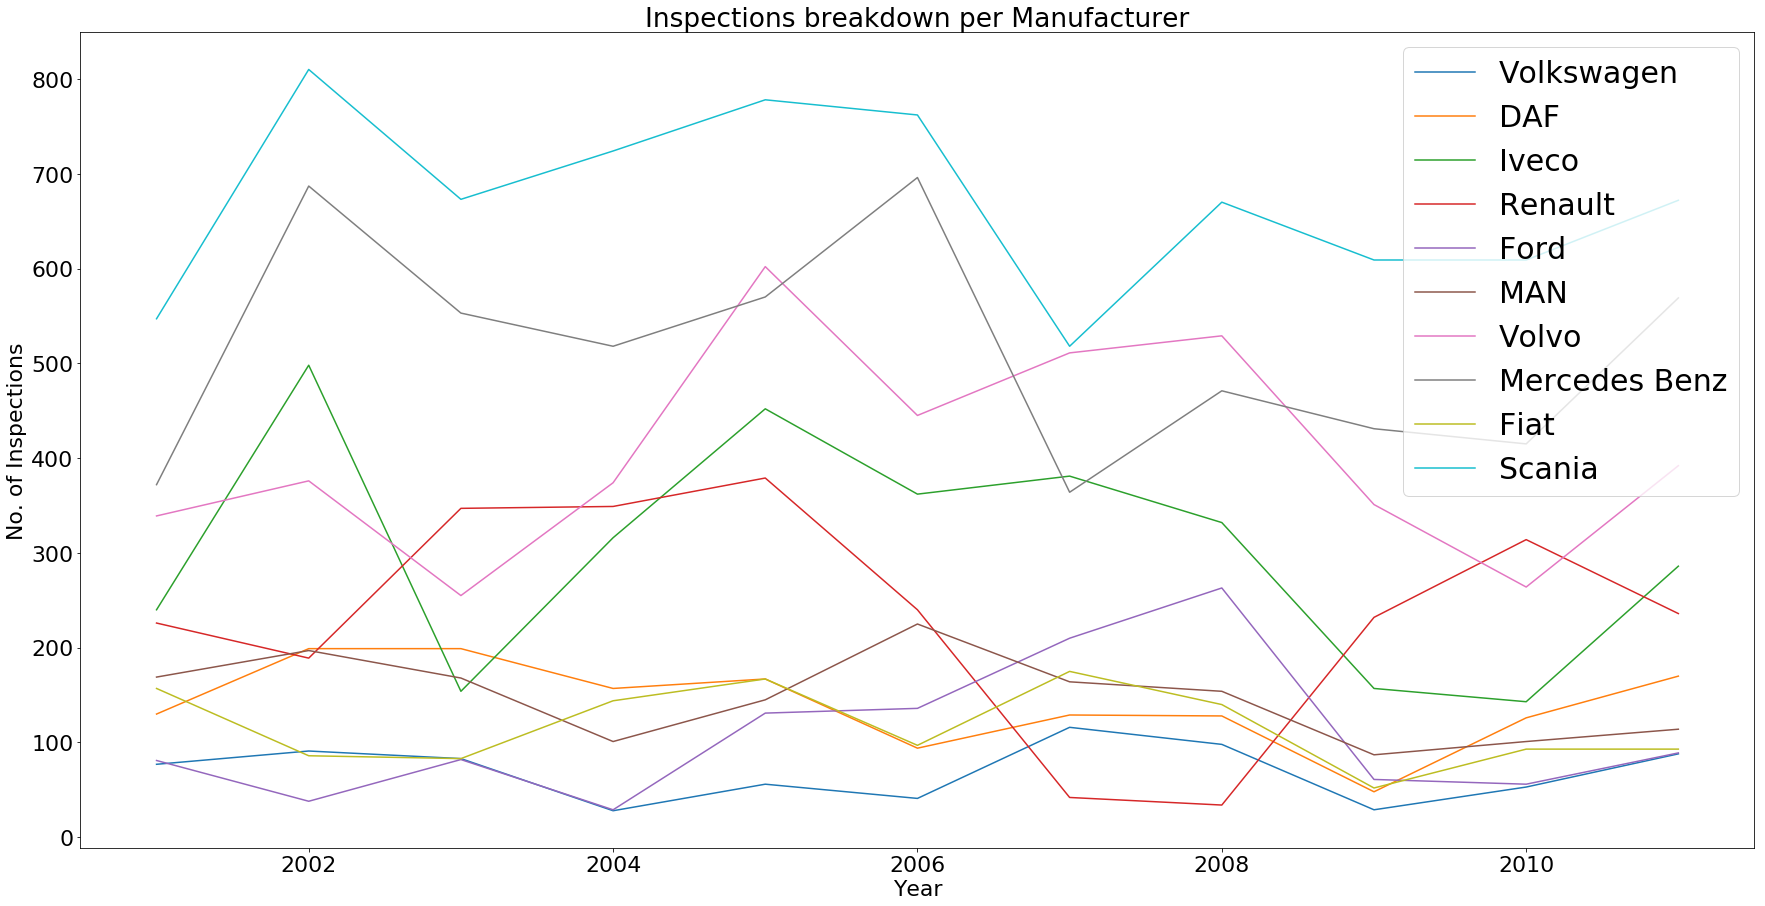

In [41]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(30,15))
plt.title('Inspections breakdown per Manufacturer')
for i in vehicle['Manufacturer'].unique():
    df = vehicle_manufacturers.xs(i, level='Manufacturer', axis=0)
    df = df[df.index > 2000]
    ax = plt.plot(years, df['size'],label=i)
plt.ylabel('No. of Inspections')
plt.xlabel('Year')
plt.legend(loc='best',prop={'size': 30});

Sampling is an optimization problem with constraints.



You must make an estimate of the actual proportion of each category on the road

Then determine a weighting of how much you over or undersample a category (or multiple category groups eg. Mercedes HGV)

For example,if there is a  high condition score for that category, then undersample by a proportion p
the lower bound of p is determined by meeting the constraint of sampling every vehicle every 12 years at least

The reverse is done for oversampling, the bound is decided by  every vehicle is sampled 6 years at most.

Lots of other considerations for the algorithm: how representative should the sample be each year,which categories are more important to represent in population sample

**Actual Proportions of $Y_{i}$ estimate**

In [42]:
uniques = vehicle[['VehicleID','VehicleType','Manufacturer']].drop_duplicates()

In [43]:
# as every vehicle is aimed to be sampled every 12 years, the proportions of categories in Yi 
#for each year can be approximated from the number of unique vehicle Ids

In [44]:
uniques.groupby('VehicleType').size()/len(uniques)

VehicleType
Heavy Goods Vehicle    0.352089
Light Goods Vehicle    0.477010
Personnel Vehicle      0.170901
dtype: float64

In [45]:
uniques.groupby('Manufacturer').size()/len(uniques)

Manufacturer
DAF              0.052562
Fiat             0.044468
Ford             0.050271
Iveco            0.109318
MAN              0.064557
Mercedes Benz    0.177824
Renault          0.089375
Scania           0.235653
Volkswagen       0.028475
Volvo            0.147496
dtype: float64

**Contriving a score to determine which categories should be oversampled, undersampled with respect
to the actual proportions in the population**

In [46]:
# aggregating over the whole 12 years

In [47]:
vehicle_agg = vehicle.groupby(['VehicleType'])['ConditionScore'].agg(['mean', 'size'])
vehicle_agg['proportion_across_samples'] = vehicle_agg['size']/len(vehicle) # normalize size
vehicle_agg['population_proportion'] = uniques.groupby('VehicleType').size()/len(uniques) 
vehicle_agg['difference'] = vehicle_agg['proportion_across_samples'] - vehicle_agg['population_proportion']
vehicle_agg['score'] = (vehicle_agg['mean'] - 50)*vehicle_agg['difference']
vehicle_agg.sort_values('score',ascending=False)

,mean,size,proportion_across_samples,population_proportion,difference,score
VehicleType,,,,,,
Light Goods Vehicle,42.565926,13993,0.461739,0.477010,-0.015271,0.113527
Personnel Vehicle,70.326643,5281,0.174262,0.170901,0.003361,0.068320
Heavy Goods Vehicle,41.736923,11031,0.363999,0.352089,0.011910,-0.098413


I have devised a simple ranking to determine some categories the DfBL should pay special attention to. 

score := $\left( \overline {X}-50\right) \left( p_{X}-p_{Y}\right) $, where X is the overall sample population of that category,
Y is an average estimate of the actual proportion on the roads of that category, and p is the proportion

so for LGVs the sampled mean is distinctly lower than 50, so it should be relatively oversampled (want closer to every 6 years).
The difference is negative, showing that it has actually been undersampled over the period.
Therefore it definitely should be a focus for change as it should be oversampled 

For Personnel Vehicle, the sampled mean is distinctly higher than 50, so it should be relatively undersampled  (want closer to every 12 years), and the difference is positive showing that it has actually been oversampled over the period.
Therefore it definitely should be a focus for change as this category should be undersampled

once categories have the correct sample bias direction, then a scoring of say $\dfrac {\left| \overline {X}-50\right| }{\left|p_{X}-p_{Y}\right|}$, can be used to determine the first categories to focus on to increase the bias.

**For Vehicle Manufacturer**

In [48]:
# similarly

In [49]:
vehicle_man_agg = vehicle.groupby(['Manufacturer'])['ConditionScore'].agg(['mean', 'size'])
vehicle_man_agg['proportion_across_samples'] = vehicle_man_agg['size']/len(vehicle) # normalize size
vehicle_man_agg['population_proportion'] = uniques.groupby('Manufacturer').size()/len(uniques) 
vehicle_man_agg['difference'] = vehicle_man_agg['proportion_across_samples'] - vehicle_man_agg['population_proportion']
vehicle_man_agg['score'] = (vehicle_man_agg['mean'] - 50)*vehicle_man_agg['difference']
vehicle_man_agg.sort_values('score',ascending=False)

,mean,size,proportion_across_samples,population_proportion,difference,score
Manufacturer,,,,,,
Renault,47.452254,2618,0.086388,0.089375,-0.002987,0.007610
Volvo,43.378293,4441,0.146543,0.147496,-0.000953,0.006309
Volkswagen,50.827284,799,0.026365,0.028475,-0.002110,-0.001746
Iveco,41.669175,3322,0.109619,0.109318,0.000301,-0.002508
MAN,50.631393,1701,0.056129,0.064557,-0.008428,-0.005321
Mercedes Benz,49.093340,5646,0.186306,0.177824,0.008482,-0.007690
DAF,57.078306,1558,0.051411,0.052562,-0.001152,-0.008152
Fiat,42.956020,1387,0.045768,0.044468,0.001300,-0.009155
Ford,54.444783,1313,0.043326,0.050271,-0.006944,-0.030866


Renault, and Volvo should both be oversampled relative to baseline (once every 9 years), when they've in fact been undersampled over the period

In [50]:
# could do with cross_categories etc.

## <span style="color:blue"> Since 2000 the vehicle inspectors have slowly improved the algorithm that they use to determine which vehicles to inspect more frequently, so that they are getting better at inspecting vehicles in poor condition more often. What effect could this have on the results?

<span style="color:red">
This would result in a classic selection bias, where the samples selected year on year, are not representative of the actual population on the roads. $X_{i}$ is not representative of $Y_{i}$
    
    
One over-selects poor conditions more often which is the aim as expressed in the task directions
    
  
This voids the  assumption in 2.) and could explain the trend, whilst the population condition average remains stable, this would depend on the parameters of oversampling etc.



In [51]:
# One would expect the algorithm to use previous inspections of a vehicle on the road as 
#a major guideline. 
vehicle.VehicleID.nunique()/len(vehicle)

0.6767530110542814

## <span style="color:blue"> 5. Is DfBL conducting a sufficient number of inspections a year? Explain and justify your answer.

<span style="color:red">
Open ended, and the boring but actual answer is there isn't enough information from this and the directions, would at least need $n_{i}$ each year, or all the registered vehicles without their inspection results, so one knows the actual proportions of categories.


<span style="color:red">
There could have been a huge increase in goods vehicles year on year over the period,
then obviously the total number is insufficient, as not on track to achieve sampling rates
prescribed (6-12) years

<span style="color:red">
However, broadly yes, it does seem the correct number, if purely take the data and directions,
and maintain the assumption I outlined before Q1

In [52]:
np.median(vehicle['ConditionScore'])

50.0

In [53]:
len(vehicle[vehicle['ConditionScore'] <50])

13692

In [54]:
len(vehicle[vehicle['ConditionScore'] >50])

12876

approximately equal number of inspections result in a condition above and below 50

So over a 12 year period, you need to sample half the population twice (poor condition, so sample every 6 years)
and half the population once (good condition, every 12 years), can be more gradated  than that, but due to symmetry, the same result will remain

In [55]:
n = vehicle.VehicleID.nunique()
n

20509

So total number of inspections over 12 years should be

In [56]:
total_inspections = 2*n/2 +n/2

In [57]:
inspections_per_year = total_inspections/12

In [58]:
inspections_per_year

2563.625

Concordant with the actual inspections

In [59]:
score_change['size'].mean()

2525.4166666666665

In [60]:
score_change.iloc[1:]['size'].mean() # after the year 2000

2705.4545454545455

so DfBL is on track in terms of number alone

## Extra: The sampling methodology could be improved

In [61]:
X = vehicle.VehicleID.value_counts()

In [62]:
repeats = vehicle[vehicle['VehicleID'].isin(X[X>1].index)]

In [63]:
F = repeats[['VehicleID','VehicleType','Manufacturer']].drop_duplicates().reset_index()

In [64]:
L = repeats[['VehicleID','VehicleType','Manufacturer']].drop_duplicates(keep='last').reset_index()

In [65]:
first = repeats[repeats.index.isin(list(F['index']))]

In [66]:
len(first[first['ConditionScore'] > 50]) 

3922

In [67]:
# 3922 where vehicles were sampled at least twice in the period, but 
# had a score above 50 the first time, so most probably did not need to be sampled again

In [68]:
len(vehicle[vehicle['VehicleID'].isin(X[X>2].index)])
# some vehicles are being sampled more than twice in a 12 year period,
# voids constraint the department set out

1476

In [69]:
repeats
# some vehicles repeatedly score very low ~ 0, probably should not allowed to do so ,
# if it is indeed that hazardous
# eg. id 31, why being sampled in consecutive years

,VehicleID,FinancialYear,VehicleType,Manufacturer,ConditionScore,Year
0,31,2008-09,Light Goods Vehicle,Volkswagen,55,2008
1,31,2009-10,Light Goods Vehicle,Volkswagen,80,2009
5,113,2002-03,Heavy Goods Vehicle,Iveco,5,2002
6,113,2006-07,Heavy Goods Vehicle,Iveco,30,2006
8,116,2002-03,Heavy Goods Vehicle,DAF,30,2002
9,116,2008-09,Heavy Goods Vehicle,DAF,65,2008
12,120,2001-02,Heavy Goods Vehicle,DAF,60,2001
13,120,2003-04,Heavy Goods Vehicle,DAF,30,2003
14,120,2009-10,Heavy Goods Vehicle,DAF,15,2009
15,120,2011-12,Heavy Goods Vehicle,DAF,30,2011
